In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [0]:
full_features_df = pd.read_csv("/content/All_Posters_Features.csv")
full_features_df

,Unnamed: 0,imdbId,Width,Height,Hue,Saturation,Brightness,Colourfulness,Corners,Edginess,Number Of Lines (Hough),Mean Entropy,DG Image Energy Minimum,DG Image Energy Maximum,DG Image Energy Mean
0,0,268978,182,268,0.289566,0.317307,0.493287,41.523655,48,0.435260,1,5.767977,0,356123,8038.865057
1,1,30973,182,268,0.268064,0.396460,0.761431,93.641859,169,0.701259,4,5.182376,0,317807,19729.438576
2,2,23686,182,268,0.182442,0.319706,0.632708,37.933190,152,0.940084,8,6.557065,0,351213,26105.511030
3,3,2017561,182,268,0.156557,0.440561,0.672142,57.595658,111,0.646836,4,6.454978,3,322862,13146.240323
4,4,116479,182,268,0.242190,0.442489,0.294204,39.941220,100,0.414149,7,5.008403,0,224340,5427.131745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30752,30752,82769,182,268,0.486926,0.453615,0.412819,47.597628,73,1.112720,19,6.520898,0,383084,33236.516402
30753,30753,115976,182,268,0.431284,0.527088,0.462169,86.109456,40,0.446330,1,5.877357,0,268066,6600.868132
30754,30754,4311466,182,268,0.218411,0.285973,0.674517,35.157194,83,0.413087,3,5.788535,0,300655,6276.040225
30755,30755,5210048,182,268,0.216408,0.488336,0.499522,62.828648,140,0.769391,6,6.410104,0,343819,19300.933615


In [0]:
full_features_df = full_features_df.set_index("imdbId")
full_features_df.index = full_features_df.index.astype("int")
full_features_df

,Unnamed: 0,Width,Height,Hue,Saturation,Brightness,Colourfulness,Corners,Edginess,Number Of Lines (Hough),Mean Entropy,DG Image Energy Minimum,DG Image Energy Maximum,DG Image Energy Mean
imdbId,,,,,,,,,,,,,,
268978,0,182,268,0.289566,0.317307,0.493287,41.523655,48,0.435260,1,5.767977,0,356123,8038.865057
30973,1,182,268,0.268064,0.396460,0.761431,93.641859,169,0.701259,4,5.182376,0,317807,19729.438576
23686,2,182,268,0.182442,0.319706,0.632708,37.933190,152,0.940084,8,6.557065,0,351213,26105.511030
2017561,3,182,268,0.156557,0.440561,0.672142,57.595658,111,0.646836,4,6.454978,3,322862,13146.240323
116479,4,182,268,0.242190,0.442489,0.294204,39.941220,100,0.414149,7,5.008403,0,224340,5427.131745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82769,30752,182,268,0.486926,0.453615,0.412819,47.597628,73,1.112720,19,6.520898,0,383084,33236.516402
115976,30753,182,268,0.431284,0.527088,0.462169,86.109456,40,0.446330,1,5.877357,0,268066,6600.868132
4311466,30754,182,268,0.218411,0.285973,0.674517,35.157194,83,0.413087,3,5.788535,0,300655,6276.040225


In [0]:
movie_data = pd.read_csv("/content/FullMovieData.csv")
movie_data

,imdbId,Title,Genre,Poster,Genres
0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,"['Animation', 'Adventure', 'Comedy']"
1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,"['Action', 'Adventure', 'Family']"
2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,"['Comedy', 'Romance']"
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,"['Comedy', 'Drama', 'Romance']"
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,"['Comedy', 'Family', 'Romance']"
...,...,...,...,...,...
37845,83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...,"['Action', 'Thriller']"
37846,83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,['Drama']
37847,82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,['Comedy']
37848,815258,Werewolf in a Womens Prison (2006),Horror,https://images-na.ssl-images-amazon.com/images...,['Horror']


In [0]:
movie_data["Genres"] = movie_data["Genre"].str.split("|")
movie_data.head()

,imdbId,Title,Genre,Poster,Genres
0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,"[Animation, Adventure, Comedy]"
1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,"[Action, Adventure, Family]"
2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,"[Comedy, Romance]"
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,"[Comedy, Drama, Romance]"
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,"[Comedy, Family, Romance]"


In [0]:
single_genre_df = movie_data[movie_data['Genres'].str.len() == 1]
single_genre_df["Genre"] = single_genre_df["Genres"].apply(lambda x: x[0])
single_genre_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,imdbId,Title,Genre,Poster,Genres
17,113101,Four Rooms (1995),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy]
27,114117,Persuasion,Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
52,110299,Lamerica (1994),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
64,115683,Bio-Dome (1996),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy]
66,114753,Two Bits (1995),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
...,...,...,...,...,...
37838,2320388,Hidden in the Woods (2016),Thriller,https://images-na.ssl-images-amazon.com/images...,[Thriller]
37839,4882174,37 (2016),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
37846,83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
37847,82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy]


In [0]:
to_drop = ["Sport", "Talk-Show", "History", "War", "Biography", "Music", "Animation", "Fantasy"]
small_list = ["Drama", "Comedy", "Documentary","Horror"]

In [0]:
dropped_single_genre_df = single_genre_df[~single_genre_df['Genre'].isin(to_drop)]
dropped_single_genre_df

,imdbId,Title,Genre,Poster,Genres
17,113101,Four Rooms (1995),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy]
27,114117,Persuasion,Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
52,110299,Lamerica (1994),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
64,115683,Bio-Dome (1996),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy]
66,114753,Two Bits (1995),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
...,...,...,...,...,...
37838,2320388,Hidden in the Woods (2016),Thriller,https://images-na.ssl-images-amazon.com/images...,[Thriller]
37839,4882174,37 (2016),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
37846,83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
37847,82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy]


In [0]:
four_genres_df = single_genre_df[single_genre_df['Genre'].isin(small_list)]
four_genres_df = four_genres_df.set_index("imdbId")
four_genres_df

,Title,Genre,Poster,Genres
imdbId,,,,
113101,Four Rooms (1995),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy]
114117,Persuasion,Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
110299,Lamerica (1994),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
115683,Bio-Dome (1996),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy]
114753,Two Bits (1995),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
...,...,...,...,...
2145909,The Forgotten (2014),Horror,https://images-na.ssl-images-amazon.com/images...,[Horror]
4882174,37 (2016),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama]


In [0]:
merged_df = pd.merge(four_genres_df, full_features_df, left_index=True, right_index=True)
merged_df

,Title,Genre,Poster,Genres,Unnamed: 0,Width,Height,Hue,Saturation,Brightness,Colourfulness,Corners,Edginess,Number Of Lines (Hough),Mean Entropy,DG Image Energy Minimum,DG Image Energy Maximum,DG Image Energy Mean
imdbId,,,,,,,,,,,,,,,,,,
113101,Four Rooms (1995),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],29406,182,268,0.275905,0.290600,0.636555,47.159028,141,0.634356,4,5.496851,0,355660,14790.100459
115683,Bio-Dome (1996),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],15114,182,268,0.499878,0.374652,0.530032,64.502340,96,0.503832,3,6.060096,0,239174,7055.031450
114753,Two Bits (1995),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama],8058,182,268,0.566163,0.563819,0.561445,62.551366,105,0.513777,5,5.661848,0,322654,9183.277719
113149,French Twist (1995),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],13161,182,268,0.174916,0.096636,0.902804,31.851025,66,0.494557,5,3.448287,0,385587,15810.989503
115697,Black Sheep (1996),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],336,182,268,0.538434,0.432386,0.589436,66.557975,118,0.523471,6,5.461135,0,323968,8943.787846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145909,The Forgotten (2014),Horror,https://images-na.ssl-images-amazon.com/images...,[Horror],6918,182,268,0.259115,0.138599,0.084355,10.660491,12,0.111179,3,2.192186,0,263171,2835.134041
4882174,37 (2016),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama],10372,182,268,0.511051,0.449251,0.364432,42.153905,75,0.438786,1,5.220368,0,343259,8925.335903
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama],10253,182,268,0.280889,0.483858,0.801704,91.220952,139,0.640278,5,5.943166,0,324734,12316.375308


In [0]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(merged_df["Genre"])
y_labels = le.classes_
X = merged_df[["Hue", "Saturation", "Brightness", "Colourfulness", "Corners", "Edginess", "Number Of Lines (Hough)", "Mean Entropy", "DG Image Energy Maximum", "DG Image Energy Mean"]]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.49185123276222315

In [0]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.42498955286251566

In [0]:
clf = RandomForestClassifier(max_depth=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.552444630171333

In [0]:
docs_df = merged_df[merged_df["Genre"] == "Documentary"]
comedy_df = merged_df[merged_df["Genre"] == "Comedy"]
drama_df = merged_df[merged_df["Genre"] == "Drama"]
horror_df = merged_df[merged_df["Genre"] == "Horror"]

In [0]:
hist_data = [docs_df["Colourfulness"], comedy_df["Colourfulness"], drama_df["Colourfulness"], horror_df["Colourfulness"]]
group_labels = ['Documentary', 'Comedy', 'Drama', 'Horror']
fig = ff.create_distplot(hist_data, group_labels, show_curve = False)
fig.update_layout(
    autosize=False,
    width=1030,
    height=700,
)
fig.show()

In [0]:
hist_data = [docs_df["Hue"], comedy_df["Hue"], drama_df["Hue"], horror_df["Hue"]]
group_labels = ['Documentary', 'Comedy', 'Drama', 'Horror']
fig = ff.create_distplot(hist_data, group_labels, show_curve = False)
fig.update_layout(
    autosize=False,
    width=1030,
    height=700,
)
fig.show()

In [0]:
hist_data = [docs_df["Brightness"], comedy_df["Brightness"], drama_df["Brightness"], horror_df["Brightness"]]
group_labels = ['Documentary', 'Comedy', 'Drama', 'Horror']
fig = ff.create_distplot(hist_data, group_labels, show_curve = False)
fig.update_layout(
    autosize=False,
    width=1030,
    height=700,
)
fig.show()

In [0]:
hist_data = [docs_df["DG Image Energy Mean"], comedy_df["DG Image Energy Mean"], drama_df["DG Image Energy Mean"], horror_df["DG Image Energy Mean"]]
group_labels = ['Documentary', 'Comedy', 'Drama', 'Horror']
fig = ff.create_distplot(hist_data, group_labels, show_curve = False)
fig.update_layout(
    autosize=False,
    width=1030,
    height=700,
)
fig.show()

In [0]:
hist_data = [docs_df["Colourfulness"], comedy_df["Colourfulness"], drama_df["Colourfulness"], horror_df["Colourfulness"]]
group_labels = ['Documentary', 'Comedy', 'Drama', 'Horror']
fig = ff.create_distplot(hist_data, group_labels, show_curve = False)
fig.update_layout(
    autosize=False,
    width=1030,
    height=700,
)
fig.show()

In [55]:
ser = pd.Series(data = clf.feature_importances_, index = X_train.columns)
ser

Hue                        0.100986
Saturation                 0.091721
Brightness                 0.152685
Colourfulness              0.139405
Corners                    0.078271
Edginess                   0.100759
Number Of Lines (Hough)    0.050194
Mean Entropy               0.087461
DG Image Energy Maximum    0.078757
DG Image Energy Mean       0.119762
dtype: float64

In [61]:
y_test

array([1, 2, 0, ..., 2, 2, 1])

In [62]:
le.classes_

array(['Comedy', 'Documentary', 'Drama', 'Horror'], dtype=object)

In [0]:
cm = confusion_matrix(y_test, clf.predict(X_test), le.transform(['Comedy', 'Documentary', 'Drama', 'Horror']))

In [74]:
cm

array([[378,   6, 316,   0],
       [ 76,   9, 298,   0],
       [215,  15, 932,   2],
       [ 33,   4, 106,   3]])

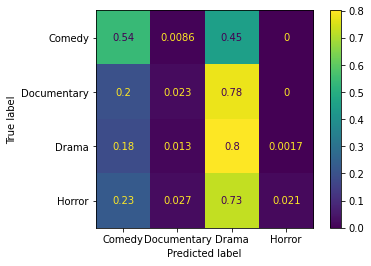

In [77]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, labels = le.transform(['Comedy', 'Documentary', 'Drama', 'Horror']), display_labels=le.classes_, normalize="true")

In [0]:
# Suck at documentary and horror basically, okayish at comedy, good at drama.

In [0]:
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.48641872127037195

In [0]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5127455077308818

In [0]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.523192645215211

In [0]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.48641872127037195

In [0]:
movie_data = movie_data.set_index("imdbId")
movie_data.head()

,Title,Genre,Poster,Genres
imdbId,,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,"[Animation, Adventure, Comedy]"
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,"[Action, Adventure, Family]"
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,"[Comedy, Romance]"
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,"[Comedy, Drama, Romance]"
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,"[Comedy, Family, Romance]"


In [185]:
merged_df = pd.merge(movie_data, full_features_df, left_index=True, right_index=True)
merged_df

,imdbId,Title,Genre,Poster,Genres,Unnamed: 0,Width,Height,Hue,Saturation,Brightness,Colourfulness,Corners,Edginess,Number Of Lines (Hough),Mean Entropy,DG Image Energy Minimum,DG Image Energy Maximum,DG Image Energy Mean
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,"[Comedy, Drama, Romance]",26422,182,268,0.289830,0.768809,0.602676,110.994878,132,0.783405,9,5.611367,0,221215,13973.655773
8,114576,Sudden Death (1995),Action|Crime|Thriller,https://images-na.ssl-images-amazon.com/images...,"[Action, Crime, Thriller]",14417,182,268,0.195269,0.064987,0.350877,3.218781,19,0.183212,2,4.873171,0,63257,1036.491307
12,112453,Balto (1995),Animation|Adventure|Drama,https://images-na.ssl-images-amazon.com/images...,"[Animation, Adventure, Drama]",14388,182,268,0.031491,0.000432,0.673602,0.452630,105,0.334867,5,3.807485,0,311199,5833.215106
14,112760,Cutthroat Island (1995),Action|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,"[Action, Adventure, Comedy]",28934,182,268,0.137888,0.338479,0.714397,48.515696,148,0.579402,5,5.833547,0,352993,11967.517632
399,110027,Highlander: The Final Dimension (1994),Action|Fantasy|Romance,https://images-na.ssl-images-amazon.com/images...,"[Action, Fantasy, Romance]",13412,182,268,0.215965,0.089497,0.596684,23.681729,91,0.719715,10,5.106727,0,375515,19083.867066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37824,1687241,Sik-gaek: Kim-chi-jeon-jaeng (2010),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],6216,182,268,0.239868,0.197636,0.573404,39.432989,152,0.586709,7,5.898781,0,322118,11037.489585
37832,3510654,Breadcrumb Trail (2014),Documentary|Music,https://images-na.ssl-images-amazon.com/images...,"[Documentary, Music]",7680,182,268,0.267541,0.459770,0.524200,65.962500,158,0.960410,7,6.241875,0,376513,27735.246597
37837,2145909,The Forgotten (2014),Horror,https://images-na.ssl-images-amazon.com/images...,[Horror],1551,182,268,0.250667,0.594332,0.385535,62.196167,164,0.690791,2,5.918258,0,369705,16445.896670
37848,815258,Werewolf in a Womens Prison (2006),Horror,https://images-na.ssl-images-amazon.com/images...,[Horror],21497,182,268,0.152512,0.592425,0.764359,72.136085,124,0.595763,5,5.959466,0,281708,12945.257176


In [0]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(merged_df["Genres"])
X = merged_df[["Hue", "Saturation", "Brightness", "Colourfulness", "Corners", "Edginess", "Number Of Lines (Hough)", "Mean Entropy", "DG Image Energy Maximum", "DG Image Energy Mean"]]

In [171]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller',
       'War', 'Western'], dtype=object)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [0]:
forest = RandomForestClassifier()
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X_train, y_train)#
predictions = multi_target_forest.predict(X_test)

In [174]:
count = []
for i in predictions:
  count.append(i.sum())
pd.Series(count).value_counts(normalize = True)

0    0.601236
1    0.374034
2    0.023184
3    0.001546
dtype: float64

In [158]:
predictions[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [0]:
y_test[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [0]:
def easy_scoring_metric_multilabel(true_values, pred_values):
  accs = []
  for true, pred in zip(true_values, pred_values):
    for i, j in zip(true, pred):
      if i == 1 and j == 1:
        accs.append(True)
      
    accs.append(False)
  
  return accs

In [91]:
np.mean(easy_scoring_metric_multilabel(y_test, predictions))

0.18513853904282115

18-19% accuracy on multilabel multiclass classification using entire dataset. 

Let's try to adjust for class imbalances:

In [176]:
merged_df.head()

,imdbId,Title,Genre,Poster,Genres,Unnamed: 0,Width,Height,Hue,Saturation,Brightness,Colourfulness,Corners,Edginess,Number Of Lines (Hough),Mean Entropy,DG Image Energy Minimum,DG Image Energy Maximum,DG Image Energy Mean
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,"[Comedy, Drama, Romance]",26422,182,268,0.289830,0.768809,0.602676,110.994878,132,0.783405,9,5.611367,0,221215,13973.655773
8,114576,Sudden Death (1995),Action|Crime|Thriller,https://images-na.ssl-images-amazon.com/images...,"[Action, Crime, Thriller]",14417,182,268,0.195269,0.064987,0.350877,3.218781,19,0.183212,2,4.873171,0,63257,1036.491307
12,112453,Balto (1995),Animation|Adventure|Drama,https://images-na.ssl-images-amazon.com/images...,"[Animation, Adventure, Drama]",14388,182,268,0.031491,0.000432,0.673602,0.452630,105,0.334867,5,3.807485,0,311199,5833.215106
14,112760,Cutthroat Island (1995),Action|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,"[Action, Adventure, Comedy]",28934,182,268,0.137888,0.338479,0.714397,48.515696,148,0.579402,5,5.833547,0,352993,11967.517632
399,110027,Highlander: The Final Dimension (1994),Action|Fantasy|Romance,https://images-na.ssl-images-amazon.com/images...,"[Action, Fantasy, Romance]",13412,182,268,0.215965,0.089497,0.596684,23.681729,91,0.719715,10,5.106727,0,375515,19083.867066


In [177]:
y.mean(axis = 0)

array([0.14657814, 0.08375894, 0.05158325, 0.04443309, 0.30643514,
       0.12512768, 0.10010215, 0.46527068, 0.06179775, 0.046476  ,
       0.0081716 , 0.02860061, 0.10061287, 0.02298264, 0.01634321,
       0.05720123, 0.0020429 , 0.13687436, 0.04800817, 0.03217569,
       0.01174668, 0.00051073, 0.12819203, 0.03217569, 0.02196118])

In [178]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller',
       'War', 'Western'], dtype=object)

In [187]:
ser = pd.Series(data = y.mean(axis = 0), index = mlb.classes_).sort_values(ascending = False)
ser

Drama          0.465271
Comedy         0.306435
Action         0.146578
Romance        0.136874
Thriller       0.128192
Crime          0.125128
Horror         0.100613
Documentary    0.100102
Adventure      0.083759
Family         0.061798
Mystery        0.057201
Animation      0.051583
Sci-Fi         0.048008
Fantasy        0.046476
Biography      0.044433
Short          0.032176
War            0.032176
History        0.028601
Music          0.022983
Western        0.021961
Musical        0.016343
Sport          0.011747
Film-Noir      0.008172
News           0.002043
Talk-Show      0.000511
dtype: float64

In [188]:
ser[ser > 0.1]

Drama          0.465271
Comedy         0.306435
Action         0.146578
Romance        0.136874
Thriller       0.128192
Crime          0.125128
Horror         0.100613
Documentary    0.100102
dtype: float64

In [0]:
# Should probably take out everything around or lower than 10% as it would be very small
# To keep Horror/Documentray?

In [0]:
to_keep = ["Action", "Comedy", "Crime", "Drama", "Romance", "Thriller"]

In [0]:
def take_out_genres(to_keep_list, movie_genres):
  new = []
  for i in movie_genres:
    if i in to_keep_list:
      new.append(i)
  
  if len(new) == 0:
    new = np.nan

  return new

In [193]:
merged_df["Smaller Genres"] = merged_df["Genres"].apply(lambda x: take_out_genres(to_keep, x))
merged_df

,imdbId,Title,Genre,Poster,Genres,Unnamed: 0,Width,Height,Hue,Saturation,Brightness,Colourfulness,Corners,Edginess,Number Of Lines (Hough),Mean Entropy,DG Image Energy Minimum,DG Image Energy Maximum,DG Image Energy Mean,Smaller Genres
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,"[Comedy, Drama, Romance]",26422,182,268,0.289830,0.768809,0.602676,110.994878,132,0.783405,9,5.611367,0,221215,13973.655773,"[Comedy, Drama, Romance]"
8,114576,Sudden Death (1995),Action|Crime|Thriller,https://images-na.ssl-images-amazon.com/images...,"[Action, Crime, Thriller]",14417,182,268,0.195269,0.064987,0.350877,3.218781,19,0.183212,2,4.873171,0,63257,1036.491307,"[Action, Crime, Thriller]"
12,112453,Balto (1995),Animation|Adventure|Drama,https://images-na.ssl-images-amazon.com/images...,"[Animation, Adventure, Drama]",14388,182,268,0.031491,0.000432,0.673602,0.452630,105,0.334867,5,3.807485,0,311199,5833.215106,[Drama]
14,112760,Cutthroat Island (1995),Action|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,"[Action, Adventure, Comedy]",28934,182,268,0.137888,0.338479,0.714397,48.515696,148,0.579402,5,5.833547,0,352993,11967.517632,"[Action, Comedy]"
399,110027,Highlander: The Final Dimension (1994),Action|Fantasy|Romance,https://images-na.ssl-images-amazon.com/images...,"[Action, Fantasy, Romance]",13412,182,268,0.215965,0.089497,0.596684,23.681729,91,0.719715,10,5.106727,0,375515,19083.867066,"[Action, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37824,1687241,Sik-gaek: Kim-chi-jeon-jaeng (2010),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],6216,182,268,0.239868,0.197636,0.573404,39.432989,152,0.586709,7,5.898781,0,322118,11037.489585,[Comedy]
37832,3510654,Breadcrumb Trail (2014),Documentary|Music,https://images-na.ssl-images-amazon.com/images...,"[Documentary, Music]",7680,182,268,0.267541,0.459770,0.524200,65.962500,158,0.960410,7,6.241875,0,376513,27735.246597,NaN
37837,2145909,The Forgotten (2014),Horror,https://images-na.ssl-images-amazon.com/images...,[Horror],1551,182,268,0.250667,0.594332,0.385535,62.196167,164,0.690791,2,5.918258,0,369705,16445.896670,NaN
37848,815258,Werewolf in a Womens Prison (2006),Horror,https://images-na.ssl-images-amazon.com/images...,[Horror],21497,182,268,0.152512,0.592425,0.764359,72.136085,124,0.595763,5,5.959466,0,281708,12945.257176,NaN


In [194]:
new_merged_df = merged_df[merged_df['Smaller Genres'].notna()]
new_merged_df

,imdbId,Title,Genre,Poster,Genres,Unnamed: 0,Width,Height,Hue,Saturation,Brightness,Colourfulness,Corners,Edginess,Number Of Lines (Hough),Mean Entropy,DG Image Energy Minimum,DG Image Energy Maximum,DG Image Energy Mean,Smaller Genres
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,"[Comedy, Drama, Romance]",26422,182,268,0.289830,0.768809,0.602676,110.994878,132,0.783405,9,5.611367,0,221215,13973.655773,"[Comedy, Drama, Romance]"
8,114576,Sudden Death (1995),Action|Crime|Thriller,https://images-na.ssl-images-amazon.com/images...,"[Action, Crime, Thriller]",14417,182,268,0.195269,0.064987,0.350877,3.218781,19,0.183212,2,4.873171,0,63257,1036.491307,"[Action, Crime, Thriller]"
12,112453,Balto (1995),Animation|Adventure|Drama,https://images-na.ssl-images-amazon.com/images...,"[Animation, Adventure, Drama]",14388,182,268,0.031491,0.000432,0.673602,0.452630,105,0.334867,5,3.807485,0,311199,5833.215106,[Drama]
14,112760,Cutthroat Island (1995),Action|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,"[Action, Adventure, Comedy]",28934,182,268,0.137888,0.338479,0.714397,48.515696,148,0.579402,5,5.833547,0,352993,11967.517632,"[Action, Comedy]"
399,110027,Highlander: The Final Dimension (1994),Action|Fantasy|Romance,https://images-na.ssl-images-amazon.com/images...,"[Action, Fantasy, Romance]",13412,182,268,0.215965,0.089497,0.596684,23.681729,91,0.719715,10,5.106727,0,375515,19083.867066,"[Action, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37800,313579,Seung joi ngo sam (2001),Romance,https://images-na.ssl-images-amazon.com/images...,[Romance],7978,182,268,0.465821,0.411827,0.640870,70.504029,133,0.480440,4,4.817038,0,286206,8024.697597,[Romance]
37820,4354616,Crisis in Six Scenes,Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],10642,182,268,0.438647,0.445194,0.674188,73.049416,137,0.791677,5,5.742740,0,385084,21505.984542,[Comedy]
37823,1135972,Le Grand Chef (2007),Comedy|Drama,https://images-na.ssl-images-amazon.com/images...,"[Comedy, Drama]",19040,182,268,0.271596,0.047206,0.516943,3.756583,62,0.422193,3,5.395087,0,366120,8007.980031,"[Comedy, Drama]"
37824,1687241,Sik-gaek: Kim-chi-jeon-jaeng (2010),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],6216,182,268,0.239868,0.197636,0.573404,39.432989,152,0.586709,7,5.898781,0,322118,11037.489585,[Comedy]


In [0]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(new_merged_df["Smaller Genres"])
X = new_merged_df[["Hue", "Saturation", "Brightness", "Colourfulness", "Corners", "Edginess", "Number Of Lines (Hough)", "Mean Entropy", "DG Image Energy Maximum", "DG Image Energy Mean"]]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X_train, y_train)
predictions = multi_target_forest.predict(X_test)

In [230]:
np.mean(easy_scoring_metric_multilabel(y_test, predictions))

0.3108108108108108

In [231]:
count = []
for i in predictions:
  count.append(i.sum())
pd.Series(count).value_counts(normalize = True)

1    0.634804
0    0.276961
2    0.088235
dtype: float64

In [235]:
len(multi_target_forest.estimators_)

6

In [239]:
mlb.classes_

array(['Action', 'Comedy', 'Crime', 'Drama', 'Romance', 'Thriller'],
      dtype=object)

In [234]:
multi_target_forest.estimators_[0].feature_importances_

array([0.11229024, 0.09696513, 0.11021803, 0.09963806, 0.09588443,
       0.09887375, 0.05788858, 0.10670119, 0.11771693, 0.10382369])

In [0]:
d = {}
for i in range(len(mlb.classes_)):
  d[mlb.classes_[i]] = pd.Series(data = multi_target_forest.estimators_[i].feature_importances_, index = X_test.columns)

In [256]:
d["Action"].values

array([0.11229024, 0.09696513, 0.11021803, 0.09963806, 0.09588443,
       0.09887375, 0.05788858, 0.10670119, 0.11771693, 0.10382369])

In [259]:
action = d["Action"]
comedy = d["Comedy"]
crime = d["Crime"]
drama = d["Drama"]
romance = d["Romance"]
thriller = d["Thriller"]
group_labels = d.keys()
metric_labels = d["Comedy"].index

fig = go.Figure(data=[
    go.Bar(name='Action', x=metric_labels, y=action.values),
    go.Bar(name='Comedy', x=metric_labels, y=comedy.values),
    go.Bar(name='Crime', x=metric_labels, y=crime.values),
    go.Bar(name='Drama', x=metric_labels, y=drama_df.values),
    go.Bar(name='Romance', x=metric_labels, y=romance.values),
    go.Bar(name='Thriller', x=metric_labels, y=thriller.values)
])
# Change the bar mode
fig.update_layout(barmode='group', title = "Feature Importance For Different Genres", xaxis_title = "Feature", yaxis_title = "Importance")
fig.show()

In [260]:
merged_df = pd.merge(four_genres_df, full_features_df, left_index=True, right_index=True)
merged_df

,Title,Genre,Poster,Genres,Unnamed: 0,Width,Height,Hue,Saturation,Brightness,Colourfulness,Corners,Edginess,Number Of Lines (Hough),Mean Entropy,DG Image Energy Minimum,DG Image Energy Maximum,DG Image Energy Mean
imdbId,,,,,,,,,,,,,,,,,,
113101,Four Rooms (1995),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],29406,182,268,0.275905,0.290600,0.636555,47.159028,141,0.634356,4,5.496851,0,355660,14790.100459
115683,Bio-Dome (1996),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],15114,182,268,0.499878,0.374652,0.530032,64.502340,96,0.503832,3,6.060096,0,239174,7055.031450
114753,Two Bits (1995),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama],8058,182,268,0.566163,0.563819,0.561445,62.551366,105,0.513777,5,5.661848,0,322654,9183.277719
113149,French Twist (1995),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],13161,182,268,0.174916,0.096636,0.902804,31.851025,66,0.494557,5,3.448287,0,385587,15810.989503
115697,Black Sheep (1996),Comedy,https://images-na.ssl-images-amazon.com/images...,[Comedy],336,182,268,0.538434,0.432386,0.589436,66.557975,118,0.523471,6,5.461135,0,323968,8943.787846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145909,The Forgotten (2014),Horror,https://images-na.ssl-images-amazon.com/images...,[Horror],6918,182,268,0.259115,0.138599,0.084355,10.660491,12,0.111179,3,2.192186,0,263171,2835.134041
4882174,37 (2016),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama],10372,182,268,0.511051,0.449251,0.364432,42.153905,75,0.438786,1,5.220368,0,343259,8925.335903
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,[Drama],10253,182,268,0.280889,0.483858,0.801704,91.220952,139,0.640278,5,5.943166,0,324734,12316.375308


In [263]:
scaler = StandardScaler()
merged_df["Scaled Colourfulness"] = scaler.fit_transform(merged_df[["Colourfulness"]])
scaler = StandardScaler()
merged_df["Scaled Hue"] = scaler.fit_transform(merged_df[["Hue"]])
scaler = StandardScaler()
merged_df["Scaled DG Image Energy Mean"] = scaler.fit_transform(merged_df[["DG Image Energy Mean"]])
scaler = StandardScaler()
merged_df["Scaled Brightness"] = scaler.fit_transform(merged_df[["Brightness"]])
docs_df = merged_df[merged_df["Genre"] == "Documentary"]
comedy_df = merged_df[merged_df["Genre"] == "Comedy"]
drama_df = merged_df[merged_df["Genre"] == "Drama"]
horror_df = merged_df[merged_df["Genre"] == "Horror"]
group_labels = ['Documentary', 'Comedy', 'Drama', 'Horror']
metric_labels = ["Scaled Colourfulness", "Scaled Hue", "Scaled DG Image Energy Mean", "Scaled Brightness"]

fig = go.Figure(data=[
    go.Bar(name='Documentary', x=metric_labels, y=[docs_df["Scaled Colourfulness"].mean(), docs_df["Scaled Hue"].mean(), docs_df["Scaled DG Image Energy Mean"].mean(), docs_df["Scaled Brightness"].mean()]),
    go.Bar(name='Comedy', x=metric_labels, y=[comedy_df["Scaled Colourfulness"].mean(), comedy_df["Scaled Hue"].mean(), comedy_df["Scaled DG Image Energy Mean"].mean(), comedy_df["Scaled Brightness"].mean()]),
    go.Bar(name='Drama', x=metric_labels, y=[drama_df["Scaled Colourfulness"].mean(), drama_df["Scaled Hue"].mean(), drama_df["Scaled DG Image Energy Mean"].mean(), drama_df["Scaled Brightness"].mean()]),
    go.Bar(name='Horror', x=metric_labels, y=[horror_df["Scaled Colourfulness"].mean(), horror_df["Scaled Hue"].mean(), horror_df["Scaled DG Image Energy Mean"].mean(), horror_df["Scaled Brightness"].mean()]),
])
# Change the bar mode
fig.update_layout(barmode='group', title = "Scaled Means of Different Features for Different Genres", xaxis_title = "Features", yaxis_title = "Scaled Mean of Feature")
fig.show()

In [264]:
group_labels = ['Documentary', 'Comedy', 'Drama', 'Horror']
metric_labels = ["Scaled Colourfulness", "Scaled Hue", "Scaled DG Image Energy Mean", "Scaled Brightness"]

fig = go.Figure(data=[
    go.Bar(name='Documentary', x=metric_labels, y=[docs_df["Scaled Colourfulness"].std(), docs_df["Scaled Hue"].std(), docs_df["Scaled DG Image Energy Mean"].std(), docs_df["Scaled Brightness"].std()]),
    go.Bar(name='Comedy', x=metric_labels, y=[comedy_df["Scaled Colourfulness"].std(), comedy_df["Scaled Hue"].std(), comedy_df["Scaled DG Image Energy Mean"].std(), comedy_df["Scaled Brightness"].std()]),
    go.Bar(name='Drama', x=metric_labels, y=[drama_df["Scaled Colourfulness"].std(), drama_df["Scaled Hue"].std(), drama_df["Scaled DG Image Energy Mean"].std(), drama_df["Scaled Brightness"].std()]),
    go.Bar(name='Horror', x=metric_labels, y=[horror_df["Scaled Colourfulness"].std(), horror_df["Scaled Hue"].std(), horror_df["Scaled DG Image Energy Mean"].std(), horror_df["Scaled Brightness"].std()]),
])
# Change the bar mode
fig.update_layout(barmode='group', title = "Scaled Standard Deviations of Different Features for Different Genres", xaxis_title = "Features", yaxis_title = "Scaled SD of Feature")
fig.update_yaxes(range = [0.7, 1.25])
fig.show()

In [269]:
group_labels = ['Documentary', 'Comedy', 'Drama', 'Horror']
metric_labels = ["Scaled Colourfulness", "Scaled Hue", "Scaled DG Image Energy Mean", "Scaled Brightness"]

fig = go.Figure(data=[
    go.Bar(name='Documentary', x=metric_labels, y=[docs_df["Scaled Colourfulness"].std() - 1, docs_df["Scaled Hue"].std() - 1, docs_df["Scaled DG Image Energy Mean"].std() - 1, docs_df["Scaled Brightness"].std() - 1]),
    go.Bar(name='Comedy', x=metric_labels, y=[comedy_df["Scaled Colourfulness"].std() - 1, comedy_df["Scaled Hue"].std() - 1, comedy_df["Scaled DG Image Energy Mean"].std() - 1, comedy_df["Scaled Brightness"].std() - 1]),
    go.Bar(name='Drama', x=metric_labels, y=[drama_df["Scaled Colourfulness"].std() - 1, drama_df["Scaled Hue"].std() - 1, drama_df["Scaled DG Image Energy Mean"].std() - 1, drama_df["Scaled Brightness"].std() - 1]),
    go.Bar(name='Horror', x=metric_labels, y=[horror_df["Scaled Colourfulness"].std() - 1, horror_df["Scaled Hue"].std() - 1, horror_df["Scaled DG Image Energy Mean"].std() - 1, horror_df["Scaled Brightness"].std() - 1]),
])
# Change the bar mode
fig.update_layout(barmode='group', title = "Scaled Standard Deviations - 1 of Different Features for Different Genres", xaxis_title = "Features", yaxis_title = "Scaled SD of Feature")
#fig.update_yaxes(range = [0.7, 1.25])
fig.show()